In [1]:
import numpy as np
import torch

!pip install pyemma
!pip install threadpoolctl

import pyemma


     |████████████████████████████████| 1.6MB 5.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
Processing /root/.cache/pip/wheels/35/53/59/f40630becd10a799470093cd5209fcc4351da6a15650eadc3d/deeptime-0.2.6-cp37-cp37m-linux_x86_64.whl
     |████████████████████████████████| 327kB 16.7MB/s 
     |████████████████████████████████| 81kB 6.3MB/s 
  Using cached https://files.pythonhosted.org/packages/af/da/271e93bb98bc93ccac17bc1f31f814be4f9e7024ac19bf31af892a462030/mdtraj-1.9.5-cp37-cp37m-manylinux1_x86_64.whl
     |████████████████████████████████| 604kB 20.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 71kB 6.5MB/s 
  Created wheel for pyemma: filename=pyEMMA-2.5.9-cp37-cp37m-linux_x86_64.whl size=2497971 sha256=0936a9136c3c5f3f03b0f6906439322f7bdae9b91088e1ea40e45ffc7878dc45
  St

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [59]:
#latent = torch.load('/content/drive/MyDrive/DNN_TAE/latent_dnn_tae.pt',map_location='cpu')
#latent = torch.load('/content/drive/MyDrive/TAE_DC/latent_tae.pt',map_location='cpu')
latent = np.load('/content/drive/MyDrive/DNN_TAE/weighted_latent.npy')

In [60]:
unscaled = np.load('/content/drive/MyDrive/Autoencoding/Unscaled_data_sorted.npy')

In [61]:
fig = pyemma.plots.plot_free_energy(unscaled[:,0],unscaled[:,1],avoid_zero_count=True,nbins=40)
fig = pyemma.plots.plot_density(unscaled[:,0],unscaled[:,1],avoid_zero_count=True,nbins=40,cmap='nipy_spectral')

In [65]:
import matplotlib.pyplot as plt

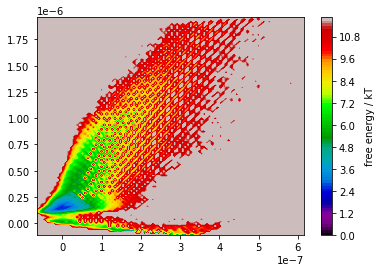

In [67]:
bound = latent[unscaled[:,0]<1.0]
fig = pyemma.plots.plot_free_energy(bound[:,0],bound[:,1],avoid_zero_count=True)
plt.savefig('bound_state.png', dpi =300)

In [35]:
#bound_dry = latent[(unscaled[:,0]<1.0) & (unscaled[:,1]<8)]

In [36]:
#bound_dry.shape

In [37]:
#fig = pyemma.plots.plot_free_energy(np.asarray(bound_dry[:,0].detach()),np.asarray(bound_dry[:,1].detach()),avoid_zero_count=True)

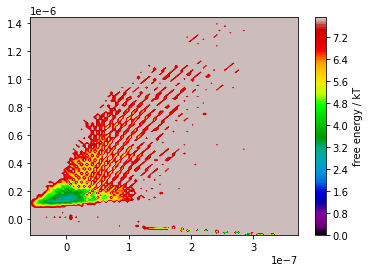

In [68]:
# wet_inter= latent[(unscaled[:,0]>1.0) & (unscaled[:,0]<1.4) & (unscaled[:,1]>16)]
# wet_inter.shape
# fig = pyemma.plots.plot_free_energy(np.asarray(wet_inter[:,0].detach()),np.asarray(wet_inter[:,1].detach()),avoid_zero_count=True)
# plt.savefig('wet_inter.png',dpi=300)

wet_inter= latent[(unscaled[:,0]>1.0) & (unscaled[:,0]<1.4) & (unscaled[:,1]>16)]
wet_inter.shape
fig = pyemma.plots.plot_free_energy(wet_inter[:,0],wet_inter[:,1],avoid_zero_count=True)
plt.savefig('wet_inter.png',dpi=300)

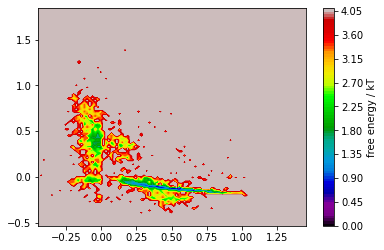

In [39]:
dry_inter= latent[(unscaled[:,0]>1.0) & (unscaled[:,0]<1.4) &  (unscaled[:,1]<16)]
dry_inter.shape
fig = pyemma.plots.plot_free_energy(np.asarray(dry_inter[:,0].detach()),np.asarray(dry_inter[:,1].detach()),avoid_zero_count=True)
plt.savefig('dry_inter.png',dpi= 300)

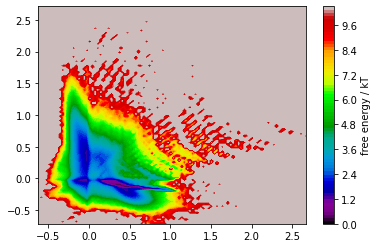

In [40]:
unbound = latent[(unscaled[:,0]>1.4)]
fig = pyemma.plots.plot_free_energy(np.asarray(unbound[:,0].detach()),np.asarray(unbound[:,1].detach()),avoid_zero_count=True)
plt.savefig('unbound.png',dpi = 300)

## Identifying the states

In [90]:

np.min(latent,axis=0)

array([-6.9073188e-08, -1.2167862e-07], dtype=float32)

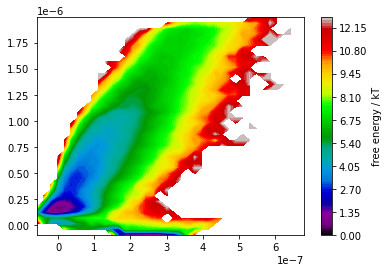

In [91]:
fig = pyemma.plots.plot_free_energy(latent[:,0],latent[:,1],nbins=40)

In [92]:
xscale = 1e-7; yscale = 1e-6

In [93]:
state0 = unscaled[(latent[:,0]>-0.02*xscale) & (latent[:,0] < 0.02*xscale) & (latent[:,1] > 0.11*yscale) & (latent[:,1] < 0.13*yscale)]

In [94]:
state0.shape

(9107, 2)

In [95]:
 np.mean(state0,axis=0)

array([ 1.56027199, 21.2801142 ])

In [44]:
state1 = unscaled[(latent[:,0]>0.10) & (latent[:,0] < 0.25) & (latent[:,1] > 0.25) & (latent[:,1] < 0.50)]

In [45]:
state1.shape

(109745, 2)

In [46]:
 np.mean(state1,axis=0)

array([ 1.65288927, 22.01263839])

In [47]:
state2 = unscaled[(latent[:,0]>-0.10) & (latent[:,0] < 0.10) & (latent[:,1] > -0.12) & (latent[:,1] < 0.00)]

In [48]:
state2.shape

(155201, 2)

In [49]:
 np.mean(state2,axis=0)

array([ 1.56388233, 21.26367742])

In [51]:
state3 = unscaled[(latent[:,0]>-0.12) & (latent[:,0] < 0.00) & (latent[:,1] > 0.25) & (latent[:,1] < 0.5)]

In [52]:
np.mean(state3,axis=0)

array([ 1.57841632, 21.63325839])